In [1]:
# cnn_model.ipynb

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Imports & Paths
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Deep_Learning/mura_modules')

import numpy as np
from cnn_model import build_cnn_model
from metrics import get_binary_metrics
from callbacks import get_callbacks
from plot_utils import plot_training_history
from config import (
    BATCH_SIZE, IMAGE_SIZE, NUM_CLASSES_BINARY, NUM_CLASSES_BODYPART
)

In [3]:
# Step 2: Load cached train & validation data
train_data = np.load('/content/drive/MyDrive/Colab Notebooks/Deep_Learning/mura_train_data.npz')
val_data = np.load('/content/drive/MyDrive/Colab Notebooks/Deep_Learning/mura_valid_data.npz')

X_train = train_data['images']
y_bin_train = train_data['labels_binary']
y_part_train = train_data['labels_bodypart']

X_val = val_data['images']
y_bin_val = val_data['labels_binary']
y_part_val = val_data['labels_bodypart']

print(f"Train: {X_train.shape=}, {y_bin_train.shape=}, {y_part_train.shape=}")
print(f"Val:   {X_val.shape=}, {y_bin_val.shape=}, {y_part_val.shape=}")

Train: X_train.shape=(36805, 224, 224, 3), y_bin_train.shape=(36805,), y_part_train.shape=(36805, 1)
Val:   X_val.shape=(3193, 224, 224, 3), y_bin_val.shape=(3193,), y_part_val.shape=(3193, 1)


In [4]:
model = build_cnn_model(
    input_shape=(224, 224, 3),  # Match the cached image size
    num_classes_binary=NUM_CLASSES_BINARY,
    num_classes_bodypart=NUM_CLASSES_BODYPART
)


In [5]:
# Step 4: Train with callbacks
callbacks = get_callbacks(model_name='cnn_model_best.h5')

history = model.fit(
    X_train, {"binary_output": y_bin_train, "bodypart_output": y_part_train},
    validation_data=(X_val, {"binary_output": y_bin_val, "bodypart_output": y_part_val}),
    batch_size=BATCH_SIZE,
    epochs=50,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
576/576 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - binary_output_accuracy: 0.5930 - binary_output_loss: 1.5804 - bodypart_output_accuracy: 0.9878 - bodypart_output_loss: 0.0725 - loss: 1.6529
Epoch 1: val_loss improved from inf to 0.71647, saving model to cnn_model_best.h5


576/576 ━━━━━━━━━━━━━━━━━━━━ 37s 44ms/step - binary_output_accuracy: 0.5930 - binary_output_loss: 1.5792 - bodypart_output_accuracy: 0.9878 - bodypart_output_loss: 0.0724 - loss: 1.6516 - val_binary_output_accuracy: 0.5355 - val_binary_output_loss: 0.7153 - val_bodypart_output_accuracy: 1.0000 - val_bodypart_output_loss: 2.2704e-04 - val_loss: 0.7165 - learning_rate: 0.0010
Epoch 2/50
575/576 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - binary_output_accuracy: 0.6515 - binary_output_loss: 0.6201 - bodypart_output_accuracy: 0.9999 - bodypart_output_loss: 2.5257e-04 - loss: 0.6204
Epoch 2: val_loss did not improve from 0.71647
576/576 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - binary_output_accuracy: 0.6515 - binary_output_loss: 0.6201 - bodypart_output_accuracy: 0.9999 - bodypart_output_loss: 2.5272e-04 - loss: 0.6204 - val_binary_output_accuracy: 0.5512 - val_binary_output_loss: 0.7379 - val_bodypart_output_accuracy: 1.0000 - val_bodypart_output_loss: 6.5761e-05 - val_loss: 0.7390 - learning_rate: 0.

576/576 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - binary_output_accuracy: 0.7314 - binary_output_loss: 0.5271 - bodypart_output_accuracy: 0.9999 - bodypart_output_loss: 0.0061 - loss: 0.5332 - val_binary_output_accuracy: 0.6495 - val_binary_output_loss: 0.6478 - val_bodypart_output_accuracy: 1.0000 - val_bodypart_output_loss: 6.9091e-05 - val_loss: 0.6487 - learning_rate: 2.0000e-04
Epoch 6/50
575/576 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - binary_output_accuracy: 0.7567 - binary_output_loss: 0.4867 - bodypart_output_accuracy: 1.0000 - bodypart_output_loss: 1.1226e-04 - loss: 0.4868
Epoch 6: val_loss did not improve from 0.64870
576/576 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - binary_output_accuracy: 0.7567 - binary_output_loss: 0.4867 - bodypart_output_accuracy: 1.0000 - bodypart_output_loss: 1.1198e-04 - loss: 0.4868 - val_binary_output_accuracy: 0.6301 - val_binary_output_loss: 0.7854 - val_bodypart_output_accuracy: 1.0000 - val_bodypart_output_loss: 6.9525e-06 - val_loss: 0.7867 - learning_rate

In [7]:
# Step 5: Evaluate binary classification (normal/abnormal)
y_pred_probs, _ = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)

from sklearn.metrics import classification_report
print("=== Binary Classification Report (Normal/Abnormal) ===")
print(classification_report(y_bin_val, y_pred, target_names=["Normal", "Abnormal"]))

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
=== Binary Classification Report (Normal/Abnormal) ===
              precision    recall  f1-score   support

      Normal       0.63      0.82      0.71      1667
    Abnormal       0.70      0.47      0.56      1526

    accuracy                           0.65      3193
   macro avg       0.66      0.64      0.63      3193
weighted avg       0.66      0.65      0.64      3193



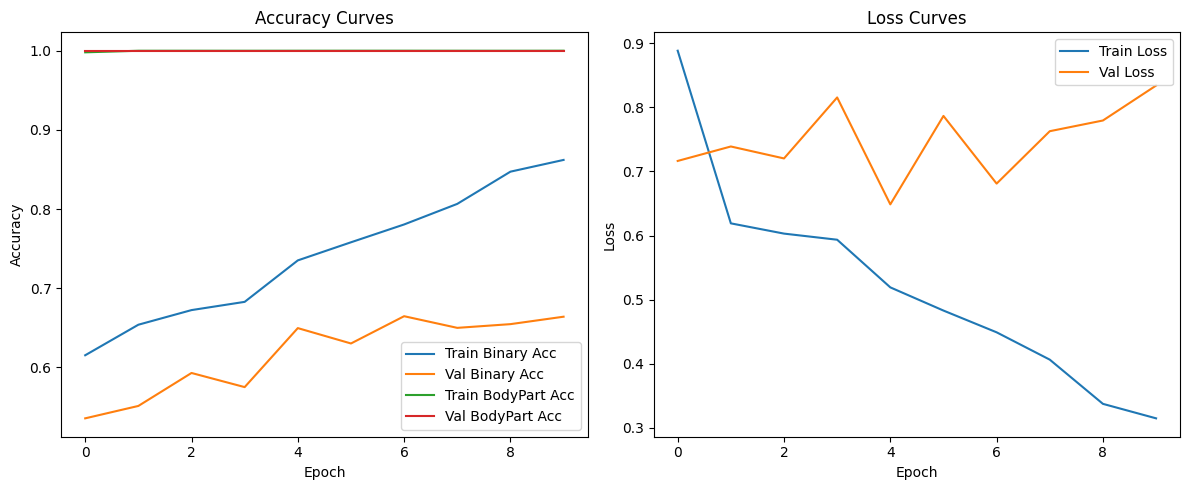

In [8]:
# Step 6: Plot training history
plot_training_history(history)